In [146]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from warnings import filterwarnings
filterwarnings(action='ignore')

In [70]:
census=pd.read_csv('census_income.csv')

In [71]:
census

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# Explanatory Data Analysis

In [72]:
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [73]:
census.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [74]:
census.keys()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [75]:
census.info

<bound method DataFrame.info of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married

In [76]:
census.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [77]:
#finding null values
census.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [78]:
#converting string values to integer using encoder
from sklearn import preprocessing
a=preprocessing.LabelEncoder()
census['education']=a.fit_transform(census['education'])

In [79]:
a=preprocessing.LabelEncoder()
census['marital.status']=a.fit_transform(census['marital.status'])

In [80]:
a=preprocessing.LabelEncoder()
census['occupation']=a.fit_transform(census['occupation'])

In [81]:
a=preprocessing.LabelEncoder()
census['relationship']=a.fit_transform(census['relationship'])

In [82]:
a=preprocessing.LabelEncoder()
census['sex']=a.fit_transform(census['sex'])

In [83]:
census['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [84]:
census['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [85]:
census['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [86]:
census['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [87]:
census.replace({'race':{'White':0,'Black':1,'Asian-Pac-Islander':3,'Amer-Indian-Eskimo':4,'Other':5}},inplace=True)

In [88]:
census.replace({'income':{'>50K':0,'<=50K':1}},inplace=True)

In [89]:
#dropping the unnecessary columns
census.drop(['native.country','workclass'],axis=1,inplace=True)

In [90]:
census

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,11,9,6,0,1,0,0,0,4356,40,1
1,82,132870,11,9,6,4,1,0,0,0,4356,18,1
2,66,186061,15,10,6,0,4,1,0,0,4356,40,1
3,54,140359,5,4,0,7,4,0,0,0,3900,40,1
4,41,264663,15,10,5,10,3,0,0,0,3900,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,15,10,4,11,1,0,1,0,0,40,1
32557,27,257302,7,12,2,13,5,0,0,0,0,38,1
32558,40,154374,11,9,2,7,0,0,1,0,0,40,0
32559,58,151910,11,9,6,1,4,0,0,0,0,40,1


# Statistical Summary

In [91]:
#correlation
census.corr()

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,-0.038057,0.088832,0.077674,0.057775,0.068756,-0.234037
fnlwgt,-0.076646,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.017548,0.026858,0.000432,-0.010252,-0.018768,0.009463
education,-0.010508,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,-0.019755,-0.027356,0.030046,0.016746,0.055510,-0.079317
education.num,0.036527,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,-0.025519,0.012280,0.122630,0.079923,0.148123,-0.335154
marital.status,-0.266288,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,0.048548,-0.129314,-0.043393,-0.034187,-0.190519,0.199307
occupation,-0.020947,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,-0.002333,0.080296,0.025505,0.017987,0.080383,-0.075468
relationship,-0.263698,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,0.077747,-0.582454,-0.057919,-0.061062,-0.248974,0.250918
race,-0.038057,-0.017548,-0.019755,-0.025519,0.048548,-0.002333,0.077747,1.000000,-0.054994,-0.004920,-0.014412,-0.027519,0.056565
sex,0.088832,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,-0.054994,1.000000,0.048480,0.045567,0.229309,-0.215980
capital.gain,0.077674,0.000432,0.030046,0.122630,-0.043393,0.025505,-0.057919,-0.004920,0.048480,1.000000,-0.031615,0.078409,-0.223329


In [92]:
census.describe()

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,0.271490,0.669205,1077.648844,87.303830,40.437456,0.759190
std,13.640433,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.818738,0.470506,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,5.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


# Finding Skewness

In [95]:
census.skew()

age                0.558743
fnlwgt             1.446980
education         -0.934042
education.num     -0.311676
marital.status    -0.013508
occupation         0.114583
relationship       0.786818
race               3.723144
sex               -0.719293
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
income            -1.212430
dtype: float64

# Remove outliers/skewness

In [96]:
from scipy.stats import zscore
z=np.abs(zscore(census))
z

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,3.769612,1.067997,0.181332,0.420060,2.249480,1.554283,0.277805,0.331601,1.422331,0.14592,10.593507,0.035429,0.563199
1,3.183112,0.539169,0.181332,0.420060,2.249480,0.608387,0.277805,0.331601,1.422331,0.14592,10.593507,1.817204,0.563199
2,2.010110,0.035220,1.214869,0.031360,2.249480,1.554283,1.589322,0.889809,1.422331,0.14592,10.593507,0.035429,0.563199
3,1.130359,0.468215,1.368974,2.363558,1.734058,0.101036,1.589322,0.331601,1.422331,0.14592,9.461864,0.035429,0.563199
4,0.177296,0.709482,1.214869,0.031360,1.585557,0.810458,0.966947,0.331601,1.422331,0.14592,9.461864,0.035429,0.563199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1.215643,1.140460,1.214869,0.031360,0.921634,1.046932,0.277805,0.331601,0.703071,0.14592,0.216660,0.035429,0.563199
32557,0.849080,0.639741,0.852205,0.746039,0.406212,1.519881,2.211698,0.331601,1.422331,0.14592,0.216660,0.197409,0.563199
32558,0.103983,0.335433,0.181332,0.420060,0.406212,0.101036,0.900181,0.331601,0.703071,0.14592,0.216660,0.035429,1.775573
32559,1.423610,0.358777,0.181332,0.420060,2.249480,1.317809,1.589322,0.331601,1.422331,0.14592,0.216660,0.035429,0.563199


In [97]:
threshold=3
print(np.where(z>3))

(array([    0,     0,     1, ..., 32546, 32552, 32554], dtype=int64), array([ 0, 10,  0, ...,  7,  7,  7], dtype=int64))


In [98]:
census_new=census[(z<3).all(axis=1)]

In [100]:
census=census_new
census.shape

(28344, 13)

# Feature Engineering

In [101]:
x=census.drop(columns=['income'],axis=1)
print(x)

       age  fnlwgt  education  education.num  marital.status  occupation  \
1470    62  159908          9             13               2           1   
1471    72  144515         10             16               2           4   
1472    76  224680         14             15               2           0   
1473    66  350498         15             10               2          14   
1474    33  262042         11              9               0           1   
...    ...     ...        ...            ...             ...         ...   
32556   22  310152         15             10               4          11   
32557   27  257302          7             12               2          13   
32558   40  154374         11              9               2           7   
32559   58  151910         11              9               6           1   
32560   22  201490         11              9               4           1   

       relationship  race  sex  capital.gain  capital.loss  hours.per.week  
1470      

In [102]:
y=census['income']
print(y)

1470     1
1471     1
1472     1
1473     1
1474     1
        ..
32556    1
32557    1
32558    0
32559    1
32560    1
Name: income, Length: 28344, dtype: int64


# Data Visualization

# Correlation Map

<Figure size 800x700 with 0 Axes>

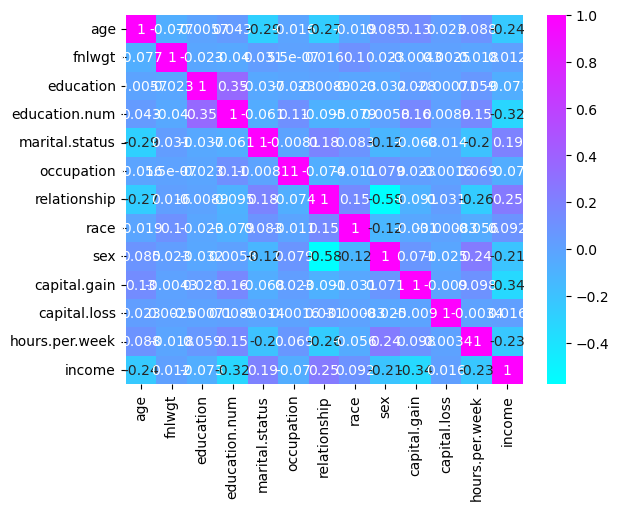

<Figure size 800x700 with 0 Axes>

In [108]:
corr_hmap = census.corr()
sns.heatmap(corr_hmap,annot=True,cmap='cool')
plt.figure(figsize=(8,7))

# Count Plot

<function matplotlib.pyplot.show(close=None, block=None)>

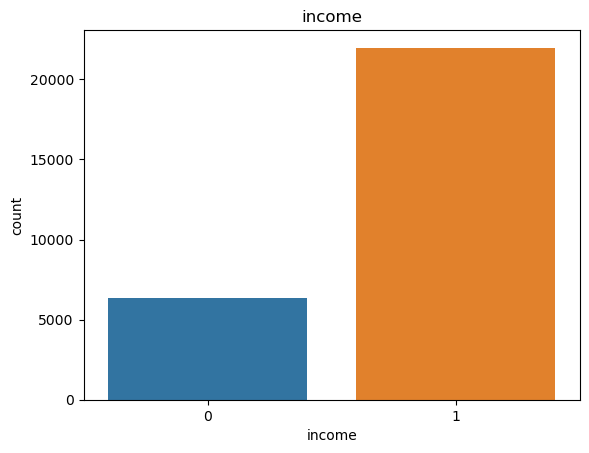

In [109]:
sns.countplot(x ='income', data = census)
plt.title('income')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

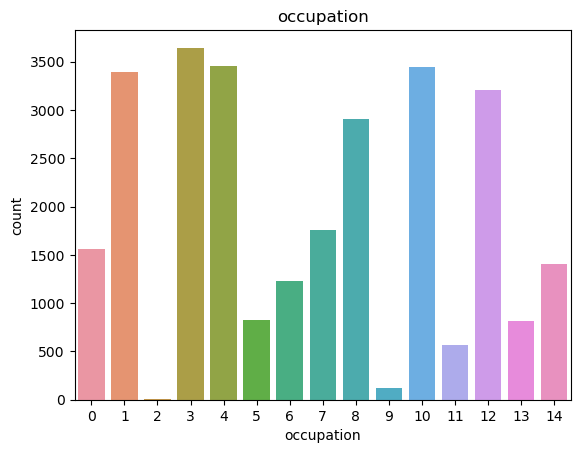

In [110]:
sns.countplot(x ='occupation', data = census)
plt.title('occupation')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

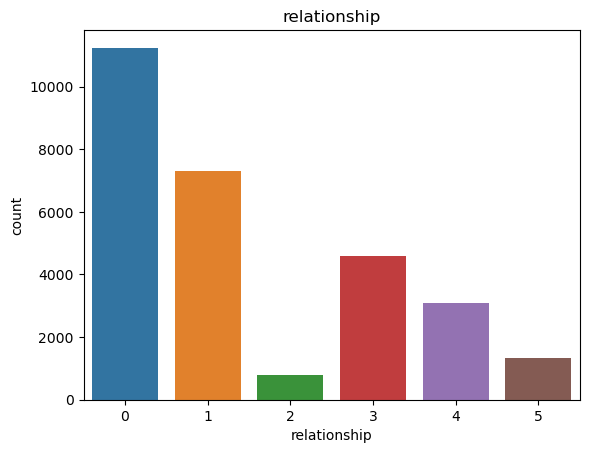

In [111]:
sns.countplot(x ='relationship', data = census)
plt.title('relationship')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

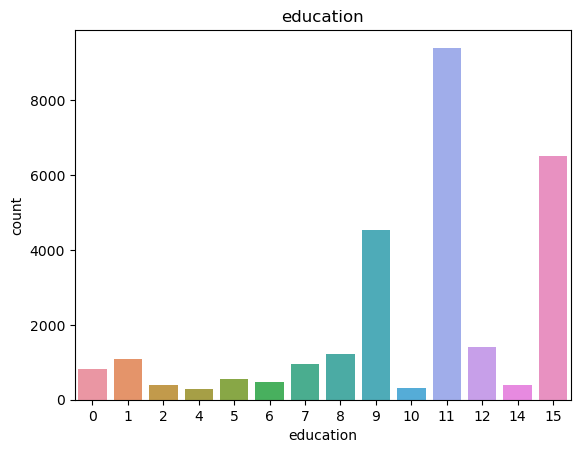

In [113]:
sns.countplot(x ='education', data = census)
plt.title('education')
plt.show

# Dist Plot

<function matplotlib.pyplot.show(close=None, block=None)>

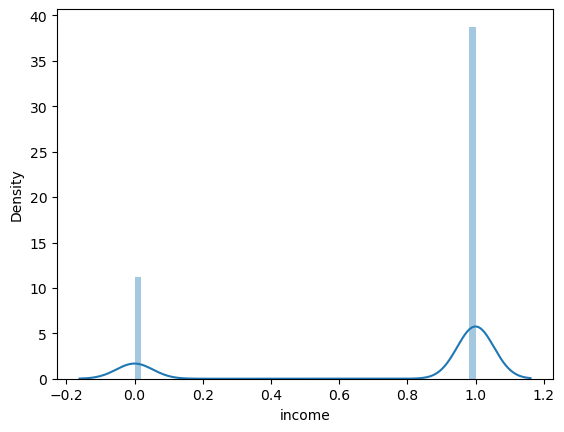

In [114]:
   sns.distplot(census['income'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

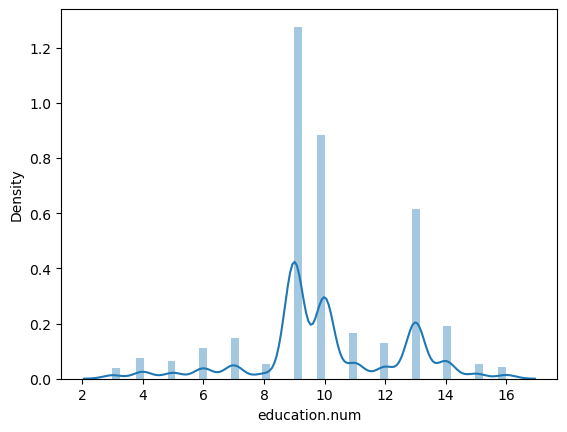

In [115]:
   sns.distplot(census['education.num'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

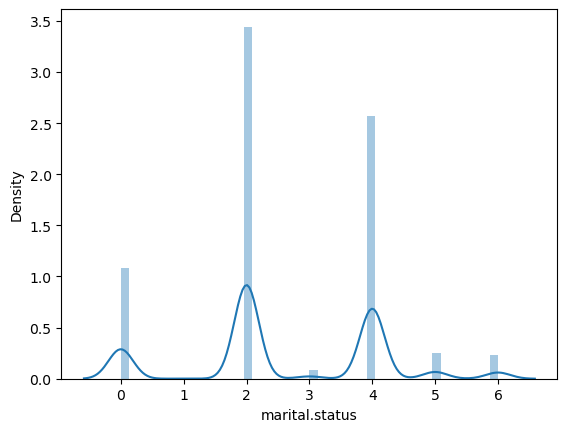

In [116]:
   sns.distplot(census['marital.status'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

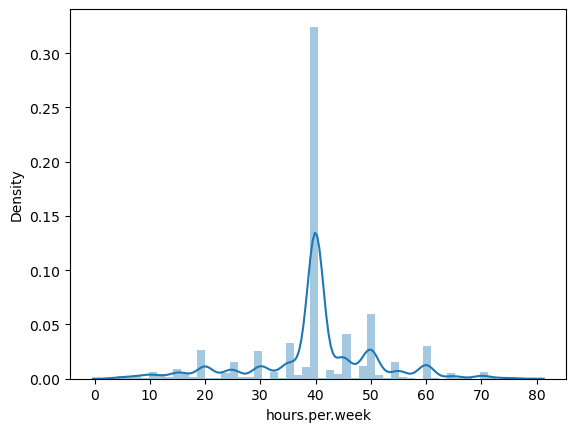

In [117]:
   sns.distplot(census['hours.per.week'])
plt.show

# Bar Plot

<Axes: xlabel='income', ylabel='hours.per.week'>

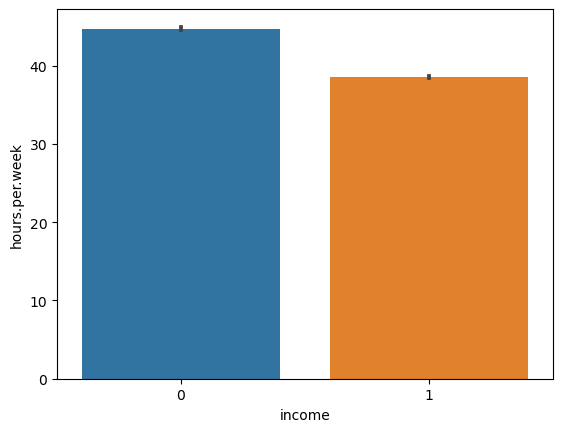

In [118]:

sns.barplot(x='income',y='hours.per.week',data=census)

<Axes: xlabel='income', ylabel='capital.gain'>

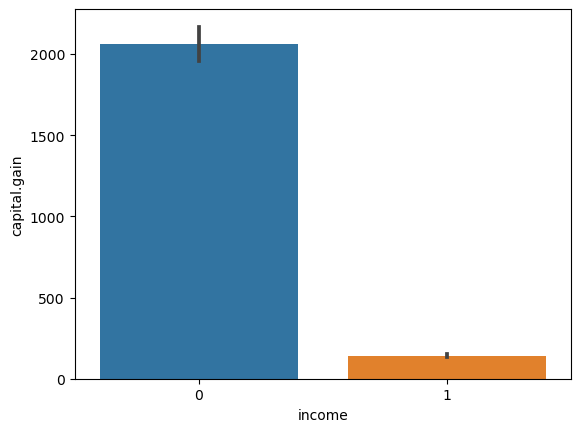

In [120]:

sns.barplot(x='income',y='capital.gain',data=census)

<Axes: xlabel='income', ylabel='capital.loss'>

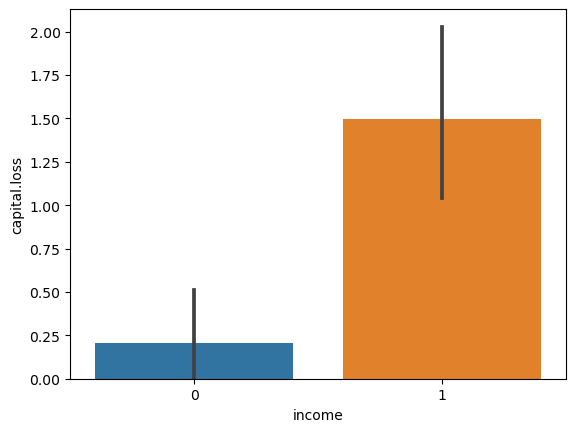

In [121]:

sns.barplot(x='income',y='capital.loss',data=census)

<Axes: xlabel='relationship', ylabel='capital.gain'>

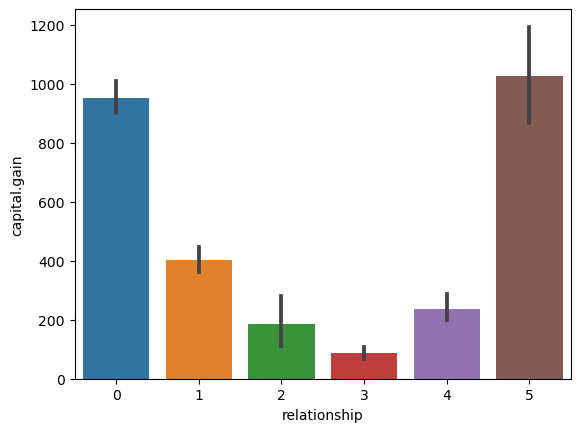

In [122]:

sns.barplot(x='relationship',y='capital.gain',data=census)

# Box Plot

age                  Axes(0.125,0.747241;0.133621x0.132759)
fnlwgt            Axes(0.285345,0.747241;0.133621x0.132759)
education          Axes(0.44569,0.747241;0.133621x0.132759)
education.num     Axes(0.606034,0.747241;0.133621x0.132759)
marital.status    Axes(0.766379,0.747241;0.133621x0.132759)
occupation           Axes(0.125,0.587931;0.133621x0.132759)
relationship      Axes(0.285345,0.587931;0.133621x0.132759)
race               Axes(0.44569,0.587931;0.133621x0.132759)
sex               Axes(0.606034,0.587931;0.133621x0.132759)
capital.gain      Axes(0.766379,0.587931;0.133621x0.132759)
capital.loss         Axes(0.125,0.428621;0.133621x0.132759)
hours.per.week    Axes(0.285345,0.428621;0.133621x0.132759)
income             Axes(0.44569,0.428621;0.133621x0.132759)
dtype: object

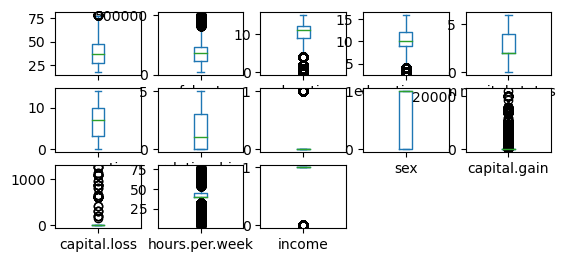

In [123]:
census.plot(kind='box',subplots=True,layout=(5,5))

# Histogram

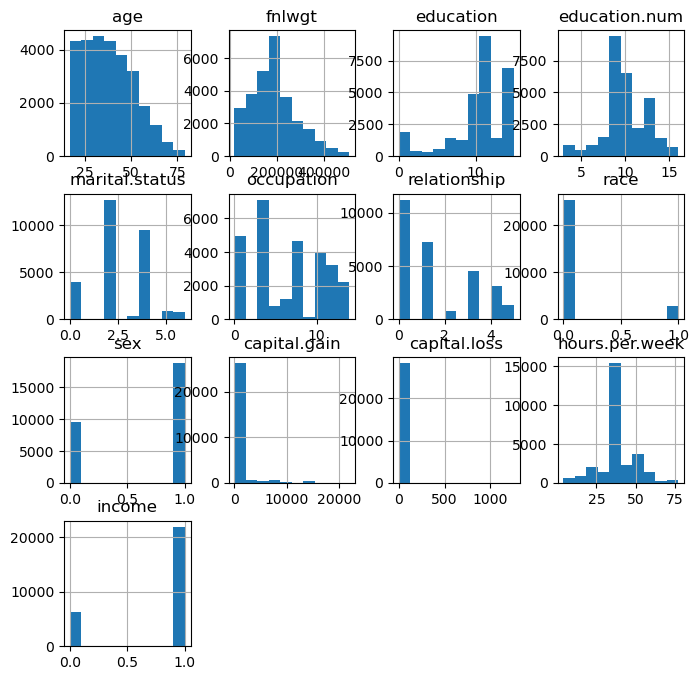

In [124]:
census.hist(figsize=(8,8),bins=10)
plt.show()

# Scatter Plot

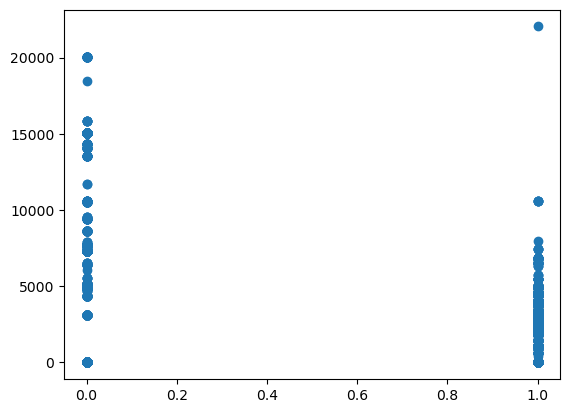

In [125]:
plt.scatter(census['income'],census['capital.gain'])
plt.show()

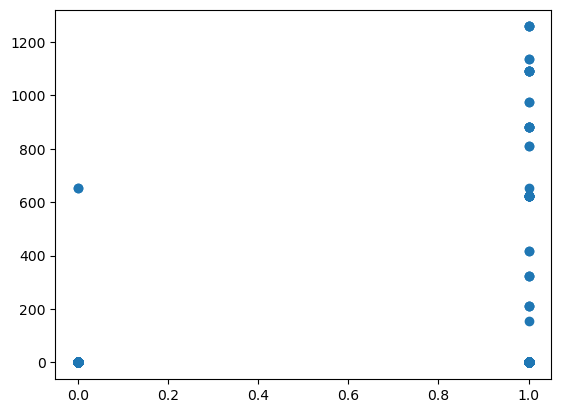

In [126]:
plt.scatter(census['income'],census['capital.loss'])
plt.show()

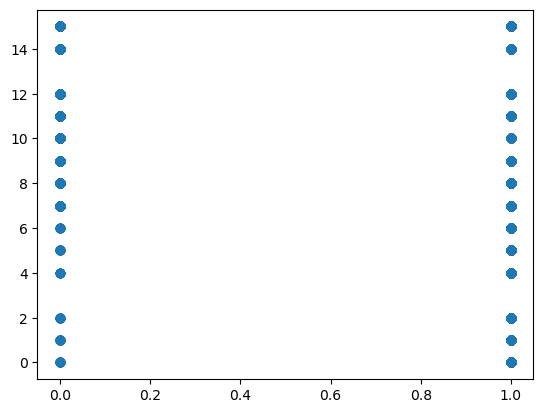

In [127]:
plt.scatter(census['income'],census['education'])
plt.show()

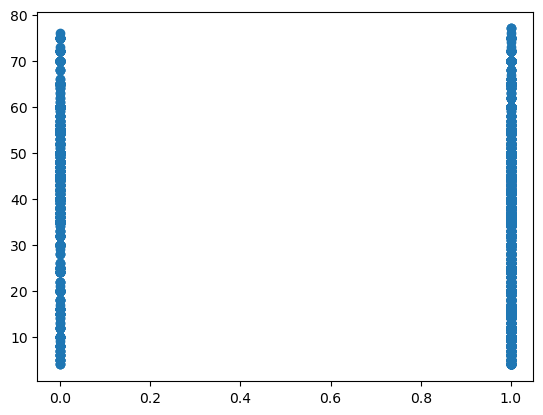

In [128]:
plt.scatter(census['income'],census['hours.per.week'])
plt.show()

# Cat Plot

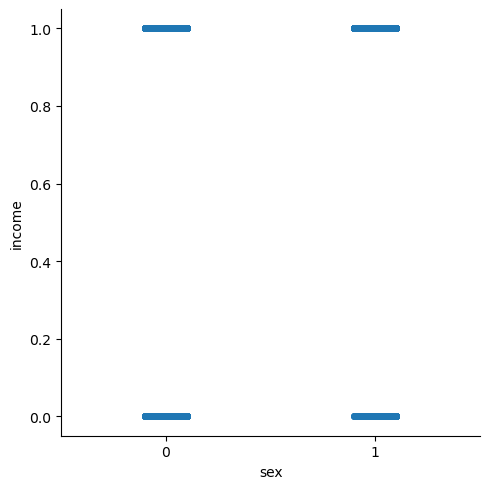

In [130]:
sns.catplot(x='sex',y='income',data=census)

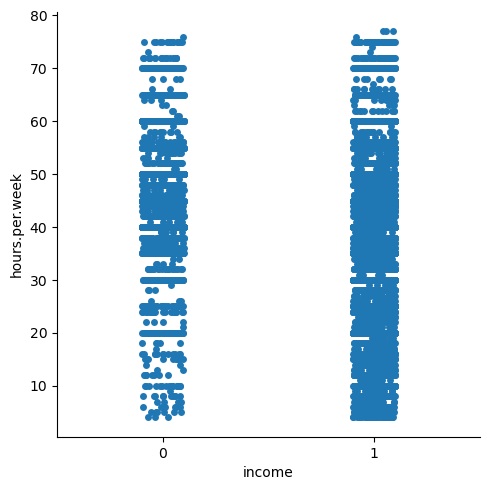

In [132]:
sns.catplot(x='income',y='hours.per.week',data=census)

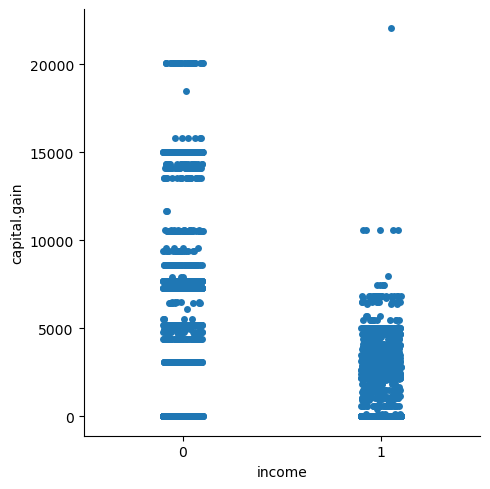

In [133]:
sns.catplot(x='income',y='capital.gain',data=census)

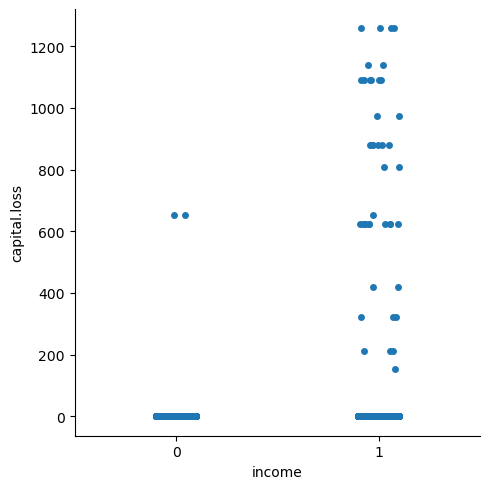

In [134]:
sns.catplot(x='income',y='capital.loss',data=census)

# Pair Plot

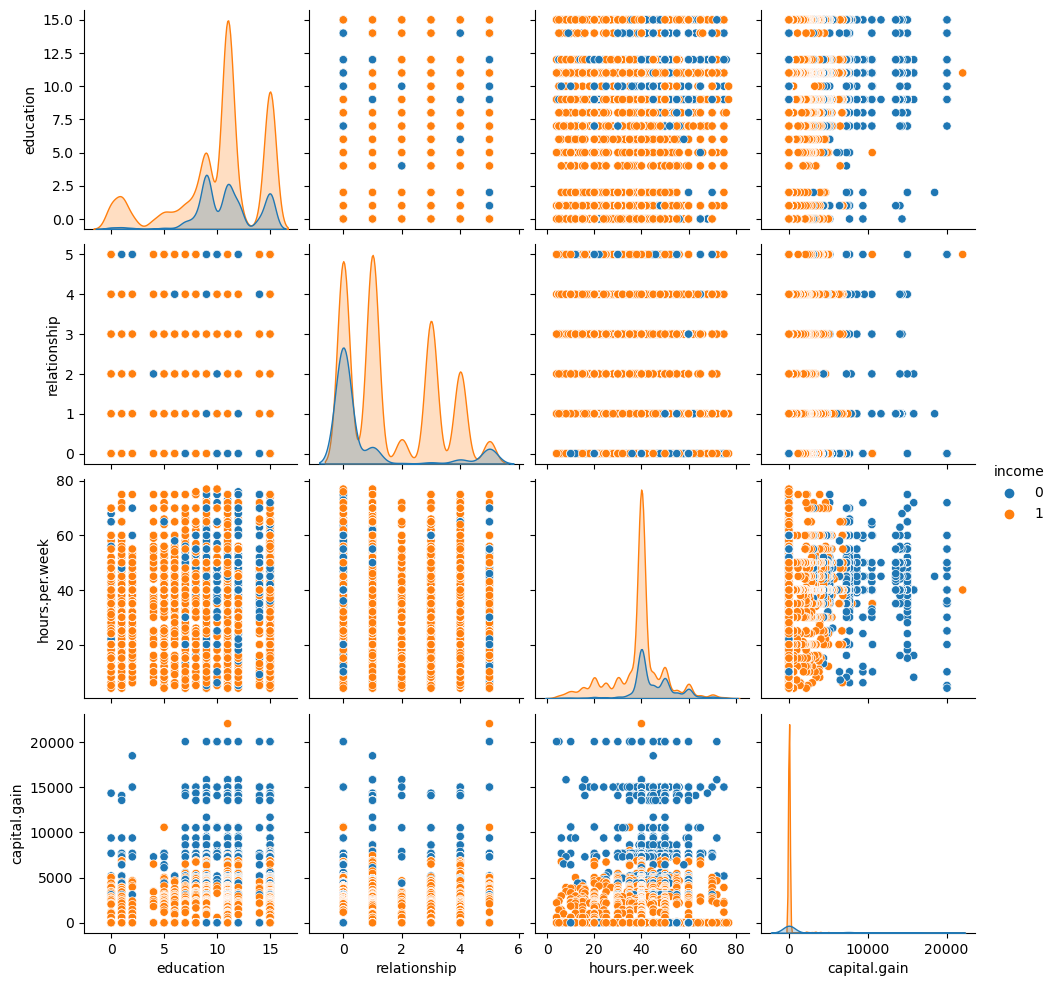

In [135]:
sns.pairplot(data=census,hue='income',vars=['education','relationship','hours.per.week','capital.gain'])

# Joint Plot

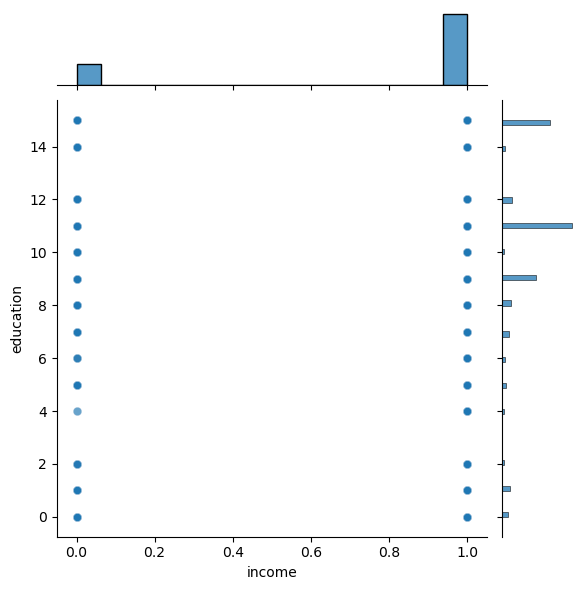

In [136]:
from scipy.stats import pearsonr
sns.jointplot(x='income', y='education', data=census, alpha=0.1)

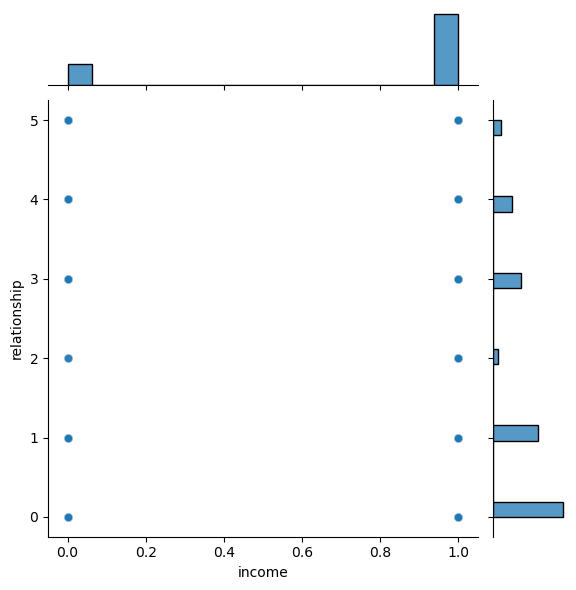

In [137]:

sns.jointplot(x='income', y='relationship', data=census, alpha=0.1)

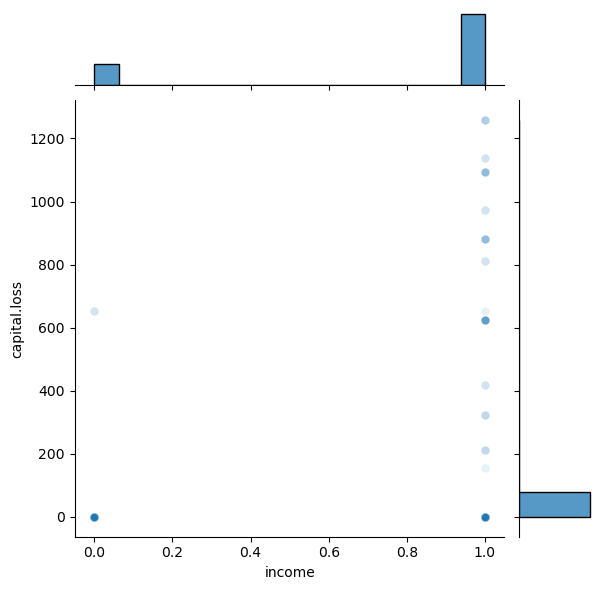

In [138]:

sns.jointplot(x='income', y='capital.loss', data=census, alpha=0.1)

# Training The Data

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [140]:
x_train.shape

(19840, 12)

In [141]:
y_train.shape

(19840,)

In [142]:
x_test.shape

(8504, 12)

In [144]:
y_test.shape

(8504,)

# Fitting the Models

In [147]:
#logistic regression
lg=LogisticRegression()

In [148]:
#training the model
lg.fit(x_train,y_train)

LogisticRegression()

In [149]:
#testing the model
pred=lg.predict(x_test)

In [150]:
pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [151]:
accuracy_score(y_test,pred)

0.8071495766698025

In [152]:
print(confusion_matrix(y_test,pred))

[[ 362 1523]
 [ 117 6502]]


<Axes: >

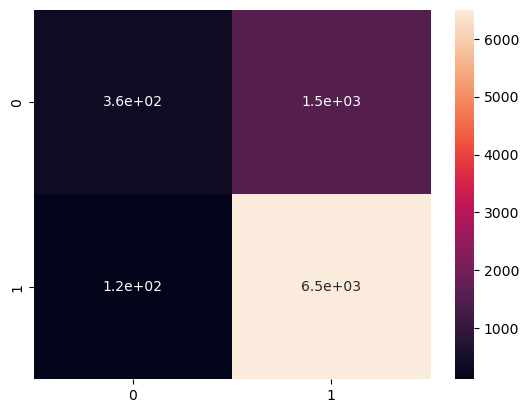

In [153]:
c=confusion_matrix(y_test,pred)
sns.heatmap(c,annot=True)

In [154]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.19      0.31      1885
           1       0.81      0.98      0.89      6619

    accuracy                           0.81      8504
   macro avg       0.78      0.59      0.60      8504
weighted avg       0.80      0.81      0.76      8504



In [155]:
mnb=MultinomialNB()

In [156]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [157]:
predmnb=mnb.predict(x_test)

In [158]:
predmnb

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [159]:
accuracy_score(y_test,predmnb)

0.7917450611476952

<Axes: >

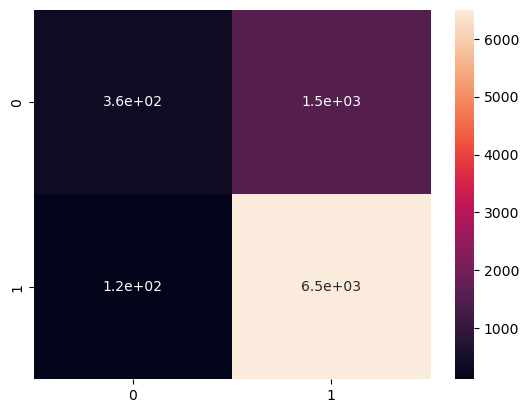

In [160]:
c=confusion_matrix(y_test,pred)
sns.heatmap(c,annot=True)

In [161]:
print(classification_report(y_test,predmnb))

              precision    recall  f1-score   support

           0       0.59      0.21      0.30      1885
           1       0.81      0.96      0.88      6619

    accuracy                           0.79      8504
   macro avg       0.70      0.58      0.59      8504
weighted avg       0.76      0.79      0.75      8504



In [229]:
gnb=GaussianNB()

In [230]:
gnb.fit(x_train,y_train)

GaussianNB()

In [231]:
predgnb=gnb.predict(x_test)

In [232]:
accuracy_score(y_test,predgnb)

0.8017403574788335

In [233]:
print(classification_report(y_test,predgnb))

              precision    recall  f1-score   support

           0       0.62      0.27      0.38      1885
           1       0.82      0.95      0.88      6619

    accuracy                           0.80      8504
   macro avg       0.72      0.61      0.63      8504
weighted avg       0.78      0.80      0.77      8504



In [167]:
knn=KNeighborsClassifier()

In [168]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [169]:
predknn=knn.predict(x_test)

In [170]:
accuracy_score(y_test,predknn)

0.7832784571966134

In [171]:
svc=SVC()

In [172]:
svc.fit(x_train,y_train)

SVC()

In [173]:
predsvc=svc.predict(x_test)

In [174]:
accuracy_score(y_test,predsvc)

0.8082079021636877

In [175]:
print(confusion_matrix(y_test,predsvc))

[[ 256 1629]
 [   2 6617]]


In [176]:
dtc=DecisionTreeClassifier()

In [177]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [178]:
preddtc=dtc.predict(x_test)

In [179]:
accuracy_score(y_test,preddtc)

0.8053857008466604

In [180]:
print(confusion_matrix(y_test,preddtc))

[[1107  778]
 [ 877 5742]]


In [181]:
rfc=RandomForestClassifier()

In [182]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [183]:
predrfc=rfc.predict(x_test)

In [184]:
accuracy_score(y_test,predrfc)

0.8453668861712136

In [185]:
print(confusion_matrix(y_test,predrfc))

[[1098  787]
 [ 528 6091]]


In [186]:
print(classification_report(y_test,predrfc))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63      1885
           1       0.89      0.92      0.90      6619

    accuracy                           0.85      8504
   macro avg       0.78      0.75      0.76      8504
weighted avg       0.84      0.85      0.84      8504



In [187]:
gb=GradientBoostingClassifier()

In [188]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [189]:
predgb=gb.predict(x_test)

In [190]:
accuracy_score(y_test,predgb)

0.8579492003762935

In [191]:
print(confusion_matrix(y_test,predgb))

[[1047  838]
 [ 370 6249]]


In [192]:
print(classification_report(y_test,predgb))

              precision    recall  f1-score   support

           0       0.74      0.56      0.63      1885
           1       0.88      0.94      0.91      6619

    accuracy                           0.86      8504
   macro avg       0.81      0.75      0.77      8504
weighted avg       0.85      0.86      0.85      8504



# AUC/ROC Curve

In [193]:
Y_pred_proba=lg.predict_proba(x_test)[:,1]

In [194]:
Y_pred_proba

array([0.02949995, 0.90557961, 0.81523942, ..., 0.28978651, 0.75944388,
       0.81437266])

In [195]:
fpr,tpr,thresholds=roc_curve(y_test,Y_pred_proba)

In [196]:
fpr

array([0.        , 0.        , 0.        , ..., 0.91671088, 0.91671088,
       1.        ])

In [197]:
tpr

array([0.00000000e+00, 1.51080224e-04, 6.04320894e-04, ...,
       9.99848920e-01, 1.00000000e+00, 1.00000000e+00])

In [198]:
thresholds

array([1.99068413e+00, 9.90684129e-01, 9.75343896e-01, ...,
       1.18820199e-01, 1.17551405e-01, 1.88869920e-03])

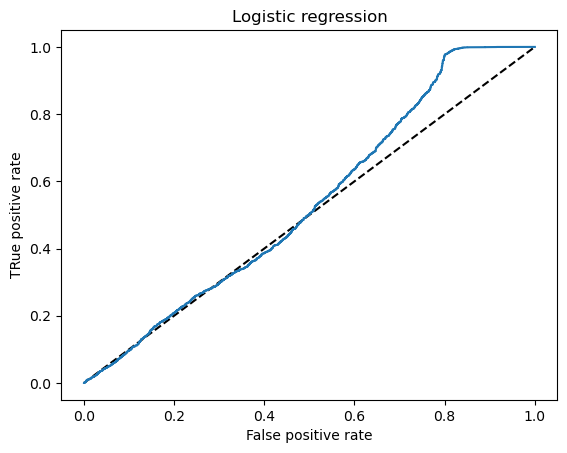

In [199]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Logistic regression')
plt.show()

In [200]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [201]:
print(auc_score)

0.5871830270786255


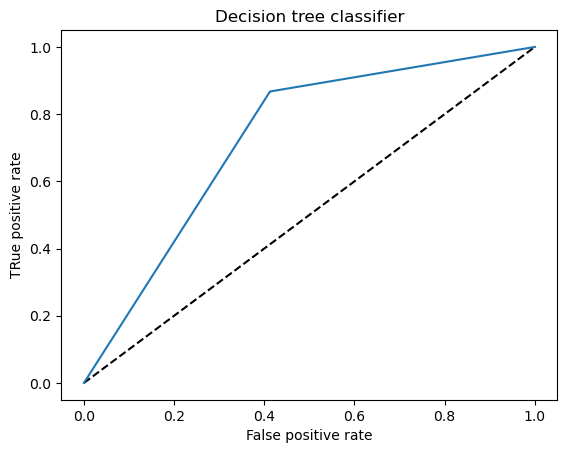

In [215]:
Y_pred_proba=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,Y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decison tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Decision tree classifier')
plt.show()

In [203]:
auc_score=roc_auc_score(Y_test,dtc.predict(X_test))

In [216]:
print(auc_score)

0.7497689915254813


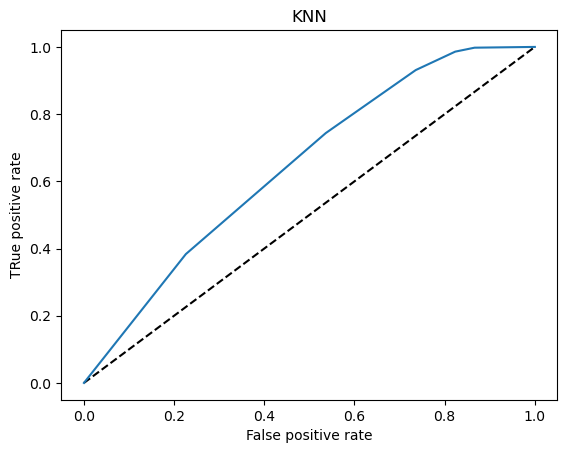

In [217]:
Y_pred_proba=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,Y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('KNN')
plt.show()

In [219]:
auc_score=roc_auc_score(y_test,knn.predict(x_test))

In [220]:
print(auc_score)

0.5976491997356697


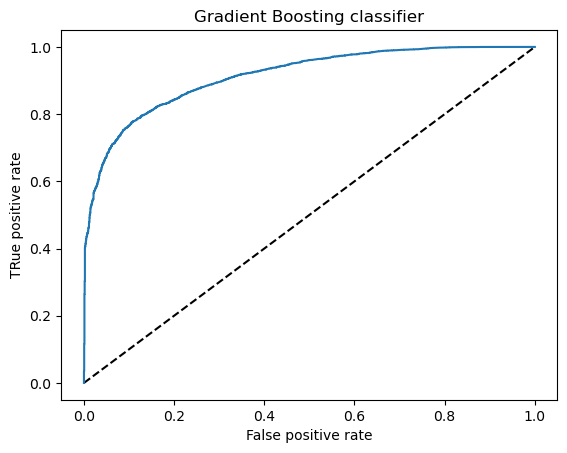

In [240]:
Y_pred_proba=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,Y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting classifier')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Gradient Boosting classifier')
plt.show()

In [222]:
auc_score=roc_auc_score(y_test,gb.predict(x_test))


In [223]:
print(auc_score)

0.7497689915254813


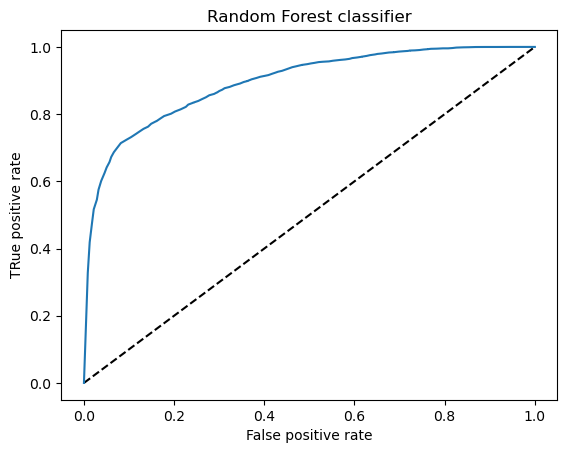

In [224]:
Y_pred_proba=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,Y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest classifier')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Random Forest classifier')
plt.show()

In [225]:
auc_score=roc_auc_score(y_test,rfc.predict(x_test))

In [226]:
print(auc_score)

0.7513615053200676


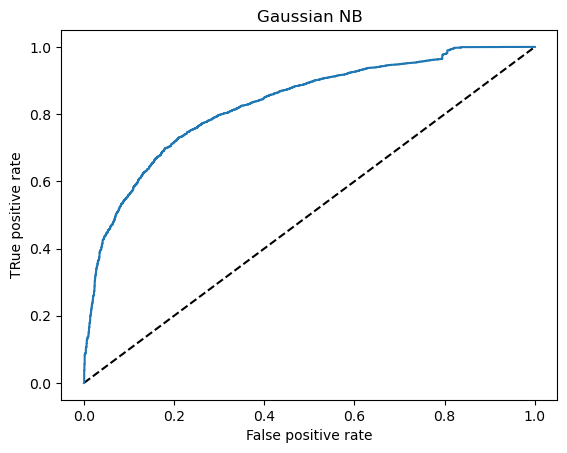

In [234]:
Y_pred_proba=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,Y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gaussian NB')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Gaussian NB')
plt.show()

In [235]:
auc_score=roc_auc_score(y_test,gnb.predict(x_test))

In [236]:
print(auc_score)

0.612164963574438


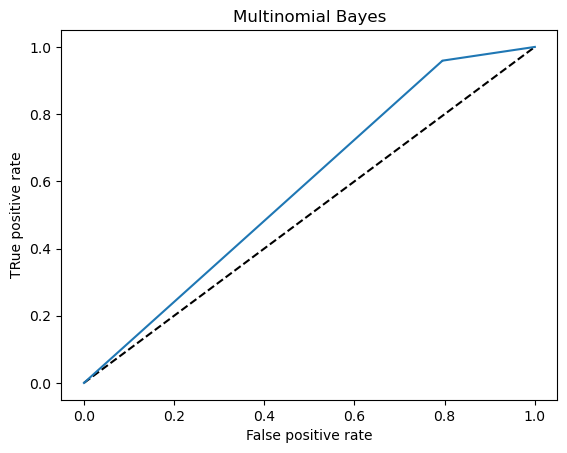

In [237]:
Y_pred_proba=mnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,Y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=' Multinomial Bayes')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Multinomial Bayes')
plt.show()

In [238]:
auc_score=roc_auc_score(y_test,mnb.predict(x_test))

In [239]:
print(auc_score)

0.5820300693726724


# Cross Validation Score

In [242]:
from sklearn.model_selection import KFold, cross_val_score
k_folds=KFold(n_splits=5)
score=cross_val_score(lg,x_train,y_train,cv=k_folds)

In [243]:
print('The Best score for Logistic Regression is',score.mean())

The Best score for Logistic Regression is 0.8044858870967742


In [244]:
k_folds=KFold(n_splits=5)
score=cross_val_score(gb,x_train,y_train,cv=k_folds)

In [245]:
print('The Best score for Gradient Boosting classifier is',score.mean())

The Best score for Gradient Boosting classifier is 0.8654233870967742


In [246]:
k_folds=KFold(n_splits=5)
score=cross_val_score(gnb,x_train,y_train,cv=k_folds)

In [247]:
print('The Best score for Gaussian NB is',score.mean())

The Best score for Gaussian NB is 0.7910282258064516


In [248]:
k_folds=KFold(n_splits=5)
score=cross_val_score(mnb,x_train,y_train,cv=k_folds)

In [249]:
print('The Best score for Multinomial bayes is',score.mean())

The Best score for Multinomial bayes is 0.7913810483870968


In [250]:
k_folds=KFold(n_splits=5)
score=cross_val_score(knn,x_train,y_train,cv=k_folds)

In [251]:
print('The Best score for KNN is',score.mean())

The Best score for KNN is 0.7824092741935484


In [252]:
k_folds=KFold(n_splits=5)
score=cross_val_score(dtc,x_train,y_train,cv=k_folds)

In [253]:
print('The Best score for Decision Tree Classifier is',score.mean())

The Best score for Decision Tree Classifier is 0.8049395161290323


In [254]:
k_folds=KFold(n_splits=5)
score=cross_val_score(rfc,x_train,y_train,cv=k_folds)

In [255]:
print('The Best score for Random Forest Classifier is',score.mean())

The Best score for Random Forest Classifier is 0.846875


In [256]:
k_folds=KFold(n_splits=5)
score=cross_val_score(svc,x_train,y_train,cv=k_folds)

In [257]:
print('The Best score for SVC is',score.mean())

The Best score for SVC is 0.8042842741935484


In [258]:
param_grid={'n_estimators':[5,10,50,100],'max_depth':[1,7,8,9],'learning_rate':[0.1,0.001,1,10]}

In [259]:
from sklearn.model_selection import RandomizedSearchCV
gb_random=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=5)

In [260]:
gb_cv=RandomizedSearchCV(GradientBoostingClassifier(),param_grid,cv=5)
gb_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.001, 1, 10],
                                        'max_depth': [1, 7, 8, 9],
                                        'n_estimators': [5, 10, 50, 100]})

In [261]:
print('Best Parameters',gb_cv.best_params_)

Best Parameters {'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.1}


In [262]:
g_fit=GradientBoostingClassifier(n_estimators= 50, max_depth= 8, learning_rate= 0.1)

In [263]:
g_fit.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=8, n_estimators=50)

In [264]:
df=pd.DataFrame({'Actual Data':y_test,'predicted Data':g_fit.predict(x_test)})

In [265]:
df

,Actual Data,predicted Data
1790,0,0
19550,1,1
25998,1,0
31982,1,1
14744,1,1
...,...,...
30164,1,0
8346,1,1
2593,0,0
21236,1,1


In [266]:
#Gradient boosting Classifier is the best model selected according to the cross validation score

# saving the best model

In [271]:
import pickle

In [268]:
saved_model=pickle.dumps(gb)

In [269]:
gb_from_pickle=pickle.loads(saved_model)

In [270]:
gb_from_pickle.predict(x_test)

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)